# US Constitution: NLP using NLTK

Source: The U.S. National Archives and Records Administration
<br>
https://www.archives.gov/founding-docs/constitution-transcript
<br>
<br>If you publish work that uses NLTK, please cite the NLTK book as follows:<br>
Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.
        

Import Libraries

In [1]:
from datetime import date
from wordcloud import STOPWORDS
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pylab import rcParams
import collections
from collections import Counter
import nltk 
from nltk import pos_tag_sents
from nltk.corpus import reuters
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS


C:\ProgramData\Anaconda3\envs\tf-gpu+base_test\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


Stopwords<br>
For additional info on please visit: https://en.wikipedia.org/wiki/Stop_words

In [2]:
english_stopwords = STOPWORDS | ENGLISH_STOP_WORDS

Load the text of the U.S. Constituton

In [3]:
f=open('us_constitution.txt','r')
raw=f.read()

Tokenize: <br>
<i>Tokenization</i> means splitting a text into meaningful parts called tokens.

In [4]:
tokens = word_tokenize(raw)

In [5]:
text = nltk.Text(tokens)

Parts of Speech<br>
This breaks down the sentence into Nouns, Verbs, Pronouns etc.

In [6]:
data = []
for i in text:
    data = data + nltk.pos_tag(nltk.word_tokenize(i))
 
for word in data: 
    if 'NNP' in word: 
        print(word)

('United', 'NNP')
('National', 'NNP')
('United', 'NNP')
('Union', 'NNP')
('United', 'NNP')
('America', 'NNP')
('Congress', 'NNP')
('United', 'NNP')
('Senate', 'NNP')
('House', 'NNP')
('House', 'NNP')
('United', 'NNP')
('Union', 'NNP')
('Number', 'NNP')
('Service', 'NNP')
('Congress', 'NNP')
('United', 'NNP')
('Number', 'NNP')
('New', 'NNP')
('Hampshire', 'NNP')
('Massachusetts', 'NNP')
('New', 'NNP')
('Jersey', 'NNP')
('Virginia', 'NNP')
('Carolina', 'NNP')
('South', 'NNP')
('Carolina', 'NNP')
('House', 'NNP')
('Senate', 'NNP')
('United', 'NNP')
('United', 'NNP')
('Vice', 'NNP')
('President', 'NNP')
('United', 'NNP')
('President', 'NNP')
('Senate', 'NNP')
('Senate', 'NNP')
('President', 'NNP')
('Vice', 'NNP')
('President', 'NNP')
('President', 'NNP')
('United', 'NNP')
('Senate', 'NNP')
('President', 'NNP')
('United', 'NNP')
('Trust', 'NNP')
('United', 'NNP')
('Party', 'NNP')
('Congress', 'NNP')
('Congress', 'NNP')
('Monday', 'NNP')
('December', 'NNP')
('Day', 'NNP')
('House', 'NNP')
('

In [7]:
for word in data: 
    if 'RP' in word: 
        print(word)

<img src ='nltk-speech-codes.png'><br>
Source: https://pythonspot.com/

In [8]:
type(word)

tuple

In [9]:
nnp_wordlist = []
for word in data: 
    if 'NNP' in word: 
        nnp_wordlist.append(word[0])
print(nnp_wordlist)

['United', 'National', 'United', 'Union', 'United', 'America', 'Congress', 'United', 'Senate', 'House', 'House', 'United', 'Union', 'Number', 'Service', 'Congress', 'United', 'Number', 'New', 'Hampshire', 'Massachusetts', 'New', 'Jersey', 'Virginia', 'Carolina', 'South', 'Carolina', 'House', 'Senate', 'United', 'United', 'Vice', 'President', 'United', 'President', 'Senate', 'Senate', 'President', 'Vice', 'President', 'President', 'United', 'Senate', 'President', 'United', 'Trust', 'United', 'Party', 'Congress', 'Congress', 'Monday', 'December', 'Day', 'House', 'Judge', 'Number', 'House', 'House', 'Member', 'House', 'Journal', 'House', 'Journal', 'House', 'Congress', 'Treasury', 'United', 'House', 'United', 'United', 'Member', 'House', 'House', 'Senate', 'House', 'Senate', 'President', 'United', 'House', 'Journal', 'House', 'House', 'House', 'Journal', 'House', 'President', 'Congress', 'Senate', 'House', 'President', 'United', 'Senate', 'House', 'Congress', 'United', 'United', 'United',

In [10]:
type(nnp_wordlist)

list

In [11]:
len(nnp_wordlist)

252

In [12]:
nnp_wordlist.count('United')

55

In [13]:
nnp_wordlist_unique =list(set(nnp_wordlist))
len(nnp_wordlist_unique)

40

In [14]:
nnp_wordlist_unique.sort()
nnp_wordlist_unique

['Act',
 'America',
 'Carolina',
 'Commerce',
 'Commission',
 'Congress',
 'Court',
 'Day',
 'December',
 'Department',
 'District',
 'Hampshire',
 'House',
 'Jersey',
 'Journal',
 'Judge',
 'Massachusetts',
 'Member',
 'Monday',
 'National',
 'Navy',
 'New',
 'Number',
 'Party',
 'President',
 'Secretary',
 'Senate',
 'September',
 'Service',
 'South',
 'Treasury',
 'Trust',
 'Union',
 'United',
 'V',
 'Vice',
 'Virginia',
 'War',
 'Washington',
 'William']

In [15]:
for i in nnp_wordlist_unique:
    a = nnp_wordlist.count(i)
    print(i, a)
    

Act 1
America 3
Carolina 2
Commerce 2
Commission 1
Congress 29
Court 6
Day 4
December 1
Department 1
District 1
Hampshire 1
House 23
Jersey 1
Journal 4
Judge 1
Massachusetts 1
Member 3
Monday 1
National 1
Navy 2
New 3
Number 11
Party 4
President 34
Secretary 1
Senate 17
September 1
Service 6
South 1
Treasury 3
Trust 4
Union 6
United 55
V 1
Vice 8
Virginia 2
War 4
Washington 1
William 1


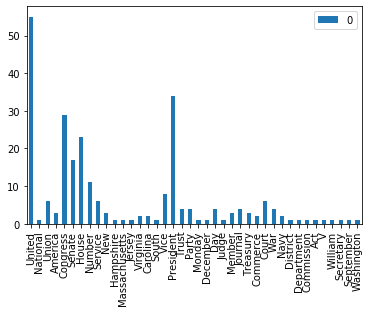

In [16]:
count = Counter(nnp_wordlist)
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

Analyze the Sentiment and Subjectivity of the Text

In [17]:
analysis = TextBlob(raw)

In [18]:
analysis.sentiment

Sentiment(polarity=0.049686611671590206, subjectivity=0.3263901906391176)